This assignment serves three purposes:

--> Introducing you to RandomForestClassifier
--> Trying to implement Dense CNN model using the skills you gained till now

This assingemnt might not contain a line to line explaination of the task to be performed. You got to start visiting the documentations or any example online to help you out with queries like syntax and parameters.

The third and the most crucial purpose of all is helping you understand how to implement different models for the same task.
Here, we have given you the task of hand-written digit classification on MNIST dataset, first using RandomForestClassifier and second using Dense CNN and if you wish, you could also try to implement this task from the model of previous assingment with of-course a little bit of tweaking. 

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [0]:
np.random.seed(0)

In [0]:
from scipy.io import loadmat
from six.moves import urllib
# set path of dataset to mnist_path varaible and loadmat() it to mnist_raw
def data_down():
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    return mnist_path
mnist_raw=loadmat(data_down())

mnist ={ "data":mnist_raw["data"].T,"target":mnist_raw["label"][0],
         "COL_NAMES":["label","data"],"DESCR": "mldata.org dataset:mnist-original",
       }

In [4]:
# store data in X and target in y
X=mnist['data']

y=mnist['target']


#Our data is expected to has 70000 instances(rows) and 784 features(columns)

print("Shape of X:"+str(X.shape))
print("Shape of Y:"+str(y.shape))

Shape of X:(70000, 784)
Shape of Y:(70000,)


In [0]:
# import matplotlib 
import matplotlib.pyplot as plt


##code to get a glance by printing the image and label

number is  2.0


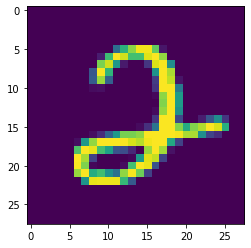

In [6]:
# pick any example from z, rehshape it to 28x28 type and display it using matplot
i=12666
print("number is ",y[i])
plt.imshow(X[i].reshape(28,28))


In [7]:
# To randomize out data set we have to shuffle it
#np.random.permutation() gives us an np.array of numbers in range given range
#  reshuffle X and y
X_train=np.random.permutation(60000)
X_train.shape
X_train[0]


3048

In [0]:
# we are dividing the data in 60,000 and 10,000 for training and testing
index=np.random.permutation(70000)
X_train=X[index[:60000]]
y_train=y[index[:60000]]

X_test=X[index[60000:]]
y_test=y[index[60000:]]

## code to get a glance by printing the image and label

number is  5.0


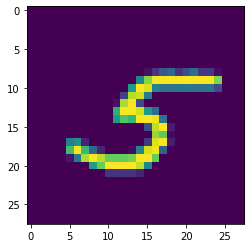

In [9]:
i=4
print("number is ",y_train[i])
plt.imshow(X_train[i].reshape(28,28))

In [10]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [11]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
#create a rondom forest classifier with random state of 42 and fit your train varaibles 





RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# predict your train X varariable and find mean_absolute error it should be around 0.00333
# repeat the same for test X it should be around 0.205


In [0]:
y_pred = classifier.predict(X_test)

In [13]:
print('train_MSE = ',mean_absolute_error(y_train,classifier.predict(X_train)))
print('test_MSE = ',mean_absolute_error(y_test,y_pred))

train_MSE =  0.0029
test_MSE =  0.2005


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 977    1    0    5    1    2    1    0    5    2]
 [   0 1106    4    2    1    1    1    4    1    0]
 [  10    5  910    5    4    7    4    8    7    2]
 [   1    5   18  987    2   16    4   13   21    4]
 [   1    2    3    1  920    1    4    0    0   27]
 [   6    1    6   31    4  845    9    0   11    6]
 [  10    2    5    0    4    8  910    2    2    0]
 [   0    9   16    3   10    2    0 1012    4    9]
 [   8    6   19   14    9   10   11    3  861   17]
 [   6    5    1   15   25    9    0    6   10  932]]


In [0]:
# Now that RandonForest has been explored, we'll be implementing Dense CNN model

In [0]:
# First order of business is creating the model
# for that purpose we've already imported the required things 
# your task is to use the above imported modules and whatever skills you have harnessed and build a model from scratch
# JUST A REMINDER , WE TRIED TO INTRODUCE YOU ALL WITH MOST OF THE LIBRARIES WHICH WE USE ON A DAILY BASIS
# ONE OF THEM IS KERAS USING WHICH YOU'LL IMPLEMENT THIS LAST ASSINGMENT 
# BUT DON'T WORRY THAT ITS NEW. THE CONCEPTS WHICH YOU ALL HAVE GAINED UPTIL NOW WILL ONLY BE USED 
# DON'T PANIC THAT YOU DON'T KNOW KERAS
# JUST GIVE IT A TRY. CREATING A MODEL IS SIMILAR TO THAT IN PYTORCH.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

# keras initializer


#simple dense network structure

In [0]:
# model
model=Sequential()

model.add(Dense(units=128,activation='relu',input_shape=(784, )))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### compile model and summary

In [62]:
# after creating the model compile it with proper optimizer and loss function 
# You can refer to any keras model training for your reference 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

### fitting the model to the training data

In [63]:
# Fit your train datasets
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3195 - sparse_categorical_accuracy: 0.9014
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1769 - sparse_categorical_accuracy: 0.9456
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1470 - sparse_categorical_accuracy: 0.9548
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1293 - sparse_categorical_accuracy: 0.9596
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1128 - sparse_categorical_accuracy: 0.9651
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1053 - sparse_categorical_accuracy: 0.9658
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9698
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0890 - sparse_categorical_accuracy: 0.9721
Epoch 9/10
1875/1875 [==========

###calculating test set test set accuracy and loss

In [64]:
# After fitting try your model with test dataset
# see the accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0867 - sparse_categorical_accuracy: 0.9778


In [65]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.9778000116348267


In [66]:
y_pred2=model.predict(X_test)
def matrix_to_pred_vector(pred):
  prediction=[]
  for row in pred:
    prediction.append(np.where(row==max(row))[0])
  return np.array(prediction).reshape(pred.shape[0],)
y_pred2=matrix_to_pred_vector(y_pred2)
print('train_MSE_nn = ',mean_absolute_error(y_train,matrix_to_pred_vector(model.predict(X_train))))
print('test_MSE_nn = ',mean_absolute_error(y_test,y_pred2))

train_MSE_nn =  0.03191666666666667
test_MSE_nn =  0.0817


###confusion matrix for random forest predictions

In [67]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[ 977    1    0    5    1    2    1    0    5    2]
 [   0 1106    4    2    1    1    1    4    1    0]
 [  10    5  910    5    4    7    4    8    7    2]
 [   1    5   18  987    2   16    4   13   21    4]
 [   1    2    3    1  920    1    4    0    0   27]
 [   6    1    6   31    4  845    9    0   11    6]
 [  10    2    5    0    4    8  910    2    2    0]
 [   0    9   16    3   10    2    0 1012    4    9]
 [   8    6   19   14    9   10   11    3  861   17]
 [   6    5    1   15   25    9    0    6   10  932]]


###confusion matrix for neural network predictions

In [68]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[ 977    0    1    1    0    0    8    0    7    0]
 [   1 1110    1    1    1    0    0    4    1    1]
 [   3    2  944    4    1    0    0    3    5    0]
 [   0    3   10 1016    0   17    1    7   15    2]
 [   2    1    2    2  940    0    4    1    1    6]
 [   2    0    1    3    1  899    4    1    6    2]
 [   2    1    0    0    2    1  936    0    1    0]
 [   0    4    8    2    2    0    0 1046    2    1]
 [   3    1    3    1    2    1    7    0  935    5]
 [   1    3    0    2    7    7    1    7    6  975]]


In [70]:
print("*************************test set predictions***************")
sum1=0
for i in cm1:
  sum1+=max(i)

print("number of corect preditcion using random forest = ",sum1)

sum2=0
for i in cm2:
  sum2+=max(i)

print("number of corect preditcion using neural network model = ",sum2)

*************************test set predictions***************
number of corect preditcion using random forest =  9460
number of corect preditcion using neural network model =  9778


In [0]:
# Understand how and where to use which model and jot down your observations in a text file in the github repository.

#summary

In [74]:
print('Random forest')
print('train_MSE = ',mean_absolute_error(y_train,classifier.predict(X_train)))
print('test_MSE = ',mean_absolute_error(y_test,y_pred))
print("number of corect test set preditcion using random forest = ",sum1)
print('======================================================================================================================================')
print('======================================================================================================================================')
print('CNN Dense model')
print('train_MSE_nn = ',mean_absolute_error(y_train,matrix_to_pred_vector(model.predict(X_train))))
print('test_MSE_nn = ',mean_absolute_error(y_test,y_pred2))
print("number of corect test set preditcion using neural network model = ",sum2)

Random forest
train_MSE =  0.0029
test_MSE =  0.2005
number of corect test set preditcion using random forest =  9460
CNN Dense model
train_MSE_nn =  0.03191666666666667
test_MSE_nn =  0.0817
number of corect test set preditcion using neural network model =  9778
